In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder,OneHotEncoder,OrdinalEncoder,MultiLabelBinarizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.cm as cm
from sklearn.utils.class_weight import compute_class_weight

## A. Exploratory Data Analysis

Column List:  
a. Customer’s ID: the customer’s ID  
b. Birth Date: the birth date of the customer  
c. Gender: the gender of the customer  
d. Item Purchased: the type of item purchased by the customer  
e. Category: the purchased item’s category  
f. Purchase Amount (USD): amount spent by the customer for the item (USD)  
g. Location: the customer’s location  
h. Size: the size of the item  
i. Color: the color of the item  
j. Season: the season when the purchase occurred  
k. Review Rating: the rating left by the customer  
l. Subscription Status: the customer’s subscription status  
m. Payment Method: the payment method used by the customer  
n. Shipping Type: the shipment type of the purchase  
o. Discount Applied: whether discounts were applied to the purchase (yes/no)  
p. Promo Code Used: whether promo codes were used for the purchase (yes/no)  
q. Previous Purchases: the last purchase made by the customer (month)  
r. Preferred Payment Method: the preferred payment method of the customer  
s. Frequency of Purchases: the average frequency of the customer’s purchases last year  

In [2]:
df = pd.read_csv('2A.tsv', delimiter = '\t')
df

,Customer ID,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,1969/03/05,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,2005/07/01,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,1974/12/01,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,2003/11/21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,1979/09/13,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,1984/02/23,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,1972/02/11,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,1978/05/02,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,1980/03/30,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [3]:
# Remove duplicate data
df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop=True)

In [4]:
# Remove identifier
df = df.drop(columns=['Customer ID'])
df.head()

,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1969/03/05,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2005/07/01,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,1974/12/01,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,2003/11/21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,1979/09/13,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Customer ID is identifier which is not useful for the model.

In [5]:
# Check missing value
missingValue = df.isnull().sum()
missingValue

Birth Date                  0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

There's no missing value in the data

In [6]:
# Select Categorical dan Numerical Column
cat_cols = []
num_cols = []

for i in df.columns:
    # print(str(df[i].dtype))
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: ['Birth Date', 'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']
Numeric: ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


Birth Date can be transformed into Age

In [7]:
# Change Birth Date to Age
df['Birth Date'] = pd.to_datetime(df['Birth Date'], format='%Y/%m/%d')

# Calculate Age
current_date = datetime.now()
df['Age'] = df['Birth Date'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))
df = df.drop(columns = ['Birth Date'])

# Input Age to Numeric
num_cols.append('Age')
cat_cols.remove('Birth Date')

df

,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age
0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,55
1,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,19
2,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50
3,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,21
4,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,40
3896,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,52
3897,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,46
3898,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,44


In [8]:
# Univariate analysis (mode)
for i in cat_cols:
    print(df[i].value_counts(),'\n')

Gender
Male      2642
Female    1231
f           17
M           10
Name: count, dtype: int64 

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64 

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64 

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota 

In gender column, there's inconsistent value like 'f' and 'M', it should be changed to consistent naming (Male and Female)

In [9]:
# Fix the inconsistent value
correction = {
    'f' : 'Female',
    'M' : 'Male',
    'Every 3 Months' : 'Quarterly'
}

df['Gender'] = df['Gender'].replace(correction)
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace(correction)
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

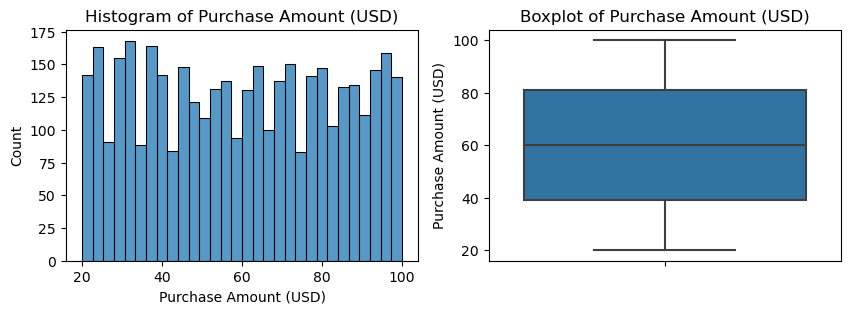

Purchase Amount (USD) - Skewness: 0.012701757626433795
Purchase Amount (USD) - Kurtosis: -1.236593691266159


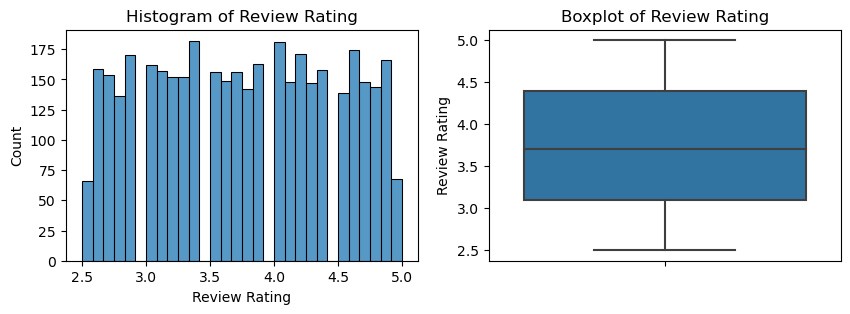

Review Rating - Skewness: 0.00452459644246527
Review Rating - Kurtosis: -1.1796283021299137


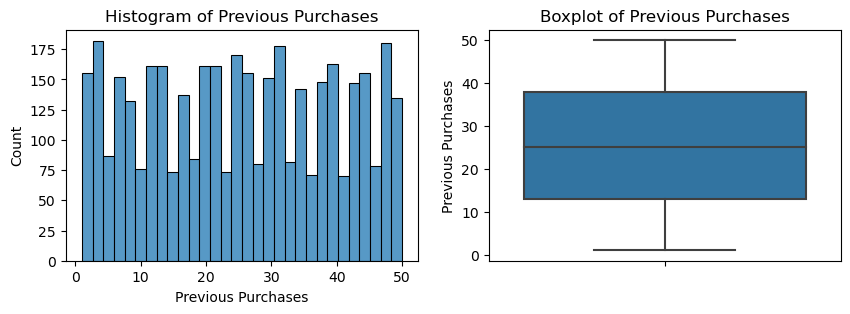

Previous Purchases - Skewness: 0.0031211555127652127
Previous Purchases - Kurtosis: -1.1901873846405375


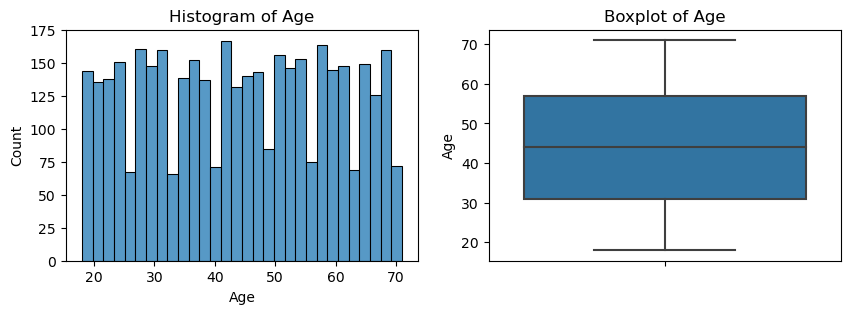

Age - Skewness: -0.0060172587327459075
Age - Kurtosis: -1.1931961081511413


In [10]:
# Check outlier and distribution
def check_distribution_outliers(dataframe, numerical):
    for col in numerical:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=30)
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(y=col, data=dataframe)
        plt.title(f'Boxplot of {col}')
        
        plt.show()

        print(f'{col} - Skewness: {dataframe[col].skew()}')
        print(f'{col} - Kurtosis: {dataframe[col].kurt()}')
        
check_distribution_outliers(df[num_cols ], num_cols)

From histogram, we can see that all of the numerical column is not normally distributed. Also, from the boxplot, there's no outlier in numerical column.

In [11]:
# check distribution
for i in num_cols:
    print(i, shapiro(df[i]))

Purchase Amount (USD) ShapiroResult(statistic=0.9502390623092651, pvalue=1.8058719079330814e-34)
Review Rating ShapiroResult(statistic=0.955574631690979, pvalue=6.472653931291532e-33)
Previous Purchases ShapiroResult(statistic=0.9540984034538269, pvalue=2.3278248507776526e-33)
Age ShapiroResult(statistic=0.9554048180580139, pvalue=5.746630416657286e-33)


Shapiro test confirms the statement that all of the numerical column is not normally distributed, because the all of the p value is < 0.05.

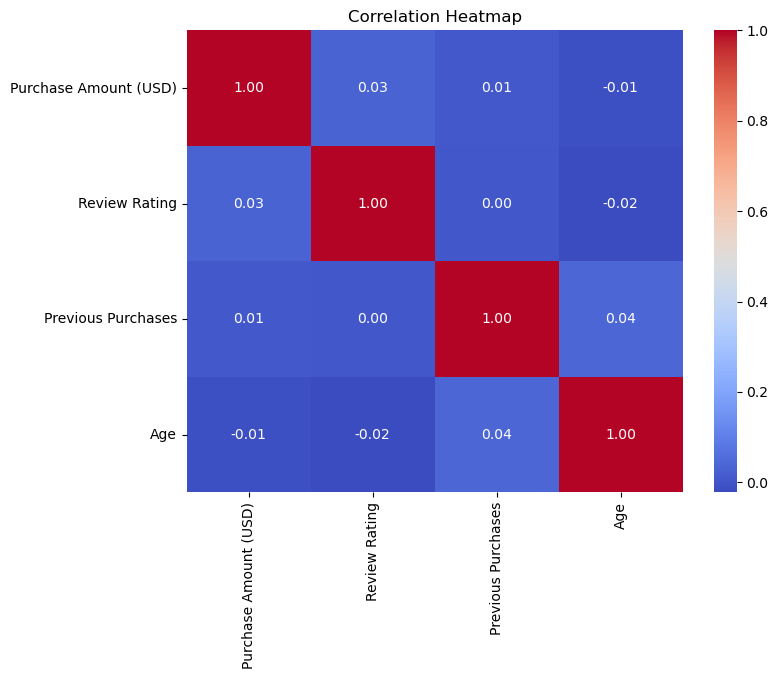

In [12]:
# Check correlation
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

All of the numerical column is not correlated, it is a great thing because K means model can works optimal if the feature not really correlated.

### EDA Summary

There is 3900 rows data and 19 column at first, but 1 identifier column was dropped later, leaving 18 column total. The data is so clean, there's no missing value at the data. Also, there's no outlier in the numerical column. All of the in the numerical column isn't normally distributed, so avoid anything that involves mean and standard deviation. The numerical data is not correlated with each other, it's a good sign for k means model so it can work optimal. However, at categorical column, specifically 'Gender' has some anomaly (inconsistent of value). In Gender column there is Male, Female, f, and M. So the anomaly value need to be changed.   
Also, in Frequency of Purchases column, there are ambiguous value, such as Bi-weekly and fortnightly, Quarterly and Every 3 Months. I assume the user choose Bi-weekly means they purchase twice a week, (in dictionary biweekly means once every two weeks OR twice a week) because there are user that choose fortnightly to represent once in two week. For Quarterly and  Every 3 Months, i assume they are the same, so i changed Every 3 Months to Quarterly.  
Overall, the data is good and clean, just need a bit of work. It's good to go, but please note that the data has many categorical columns and each column has many different values, so the encoding part will create a lot of new columns.

#### Encoding
1. Label Encoding:  
a. Gender  
b. Subscription Status  
c. Discount Applied  
d. Promo Code Used  
2. Ordinal Encoding:  
a. Size  
b. Frequency of Purchases  
3. One Hot Encoding:  
a. Item Purchased  
b. Category  
c. Location  
d. Color  
e. Season  
f. Payment Method  
g. Shipping Type  
h. Preferred Payment Method  

In [13]:
lab_enc = LabelEncoder()

label_column = ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']
for i in label_column:
    df[i] = lab_enc.fit_transform(df[[i]])

c:\Users\hense\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hense\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hense\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hense\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [14]:
ord_enc = OrdinalEncoder(categories=[['S','M','L','XL']])
df['Size'] = ord_enc.fit_transform(df[['Size']])

ord_enc = OrdinalEncoder(categories=[['Bi-Weekly','Weekly','Fortnightly','Monthly', 'Quarterly', 'Annually']])
df['Frequency of Purchases'] = ord_enc.fit_transform(df[['Frequency of Purchases']])

In [15]:
ohe_enc = OneHotEncoder(sparse_output=False)

onehot_column = ['Item Purchased', 'Category', 'Location', 'Color', 'Season', 'Payment Method', 'Shipping Type', 'Preferred Payment Method']

for i in onehot_column:
    oh_encoded = ohe_enc.fit_transform(df[[i]])
    one_hot_df = pd.DataFrame(oh_encoded, columns=ohe_enc.get_feature_names_out([i]))
    df = pd.concat([df.drop(columns=[i]),one_hot_df.astype('int')],axis=1)

df.head()

,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Age,...,Shipping Type_Free Shipping,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo
0,1,53,2.0,3.1,1,1,1,14,2.0,55,...,0,0,0,0,0,0,0,0,0,1
1,1,64,2.0,3.1,1,1,1,2,2.0,19,...,0,0,0,0,0,1,0,0,0,0
2,1,73,0.0,3.1,1,1,1,23,1.0,50,...,1,0,0,0,0,0,1,0,0,0
3,1,90,1.0,3.5,1,1,1,49,1.0,21,...,0,1,0,0,0,0,0,0,1,0
4,1,49,1.0,2.7,1,1,1,31,5.0,45,...,1,0,0,0,0,0,0,0,1,0


#### Scaling
Using MinMaxScaler because K Means works better with data in range [0,1]. Also, the numerical data doesn't have any outliers, so it is safe for using MinMaxScaler

In [16]:
mm_scaler = MinMaxScaler()
df[num_cols] = mm_scaler.fit_transform(df[num_cols])

df.head()

,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Age,...,Shipping Type_Free Shipping,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo
0,1,0.4125,2.0,0.24,1,1,1,0.265306,2.0,0.698113,...,0,0,0,0,0,0,0,0,0,1
1,1,0.5500,2.0,0.24,1,1,1,0.020408,2.0,0.018868,...,0,0,0,0,0,1,0,0,0,0
2,1,0.6625,0.0,0.24,1,1,1,0.448980,1.0,0.603774,...,1,0,0,0,0,0,1,0,0,0
3,1,0.8750,1.0,0.40,1,1,1,0.979592,1.0,0.056604,...,0,1,0,0,0,0,0,0,1,0
4,1,0.3625,1.0,0.08,1,1,1,0.612245,5.0,0.509434,...,1,0,0,0,0,0,0,0,1,0


#### PCA

In [17]:
pca = PCA()
pca.fit(df)

PCA()

Text(0, 0.5, 'Eigenvalues')

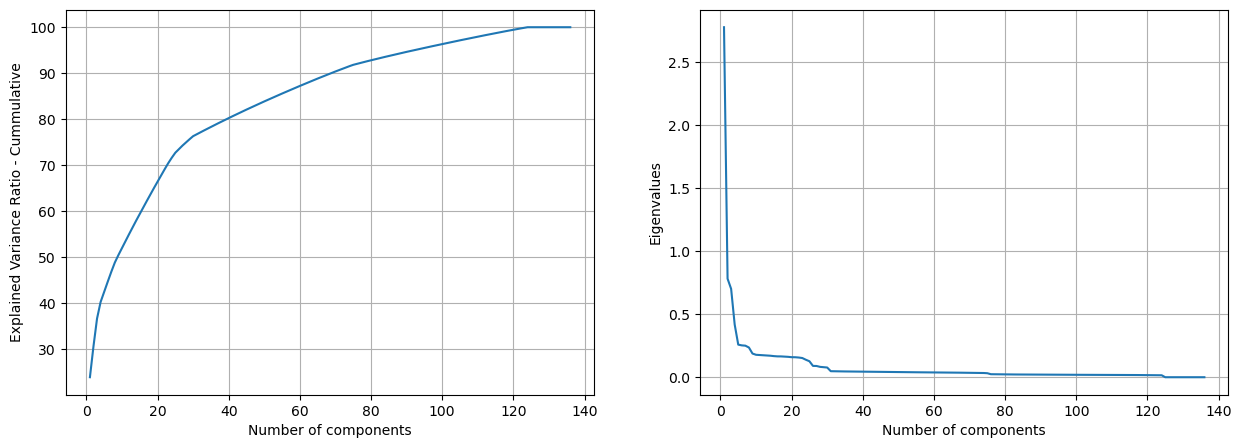

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(df.columns)+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(df.columns)+1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Based on the elbow point, the optimal number of components may be around 2-4 components, but a small number of components may cause a huge loss of variance in the data, only about 30-40% of the variance is retained. So I decided to take the number of components as 10 to retain more than 50% variance in the data.

In [19]:
pca_comp = PCA(n_components=10)

df_pca = pca_comp.fit_transform(df)
df_pca

array([[ 7.60649080e-01,  6.05353501e-01,  1.14505854e+00, ...,
         1.49020953e-02, -4.19543222e-01,  3.68188053e-01],
       [ 7.62552733e-01,  6.07155423e-01,  1.14313298e+00, ...,
         7.00262386e-04, -1.17540260e-01, -8.18604861e-02],
       [ 1.75014727e+00, -1.39946548e+00,  9.21805559e-01, ...,
        -8.84644326e-02,  4.66340944e-01, -3.43611184e-01],
       ...,
       [-1.23941145e+00,  7.36185097e-01, -7.72705496e-01, ...,
        -4.66309329e-01, -5.32370171e-01, -1.85574931e-02],
       [ 1.76144121e+00, -1.20619458e+00, -1.00303177e+00, ...,
         7.50627817e-01,  8.22755427e-02,  3.24922247e-01],
       [-1.24214069e+00, -2.92579832e-01, -8.80949454e-01, ...,
        -4.04059030e-01, -1.53096394e-01, -4.87525947e-01]])

## B. Train K Means Clustering Model

#### Silhouette Score

In [20]:
distortions = []
silhouettes = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=123)
    cluster_label=kmeanModel.fit_predict(df_pca)
    
    silhouette_avg = silhouette_score(df_pca, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    
    distortions.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.31064031448994894
For n_clusters = 3 The average silhouette_score is : 0.21158305431024427
For n_clusters = 4 The average silhouette_score is : 0.17004438913595066
For n_clusters = 5 The average silhouette_score is : 0.15614644993451884
For n_clusters = 6 The average silhouette_score is : 0.1498411572622178
For n_clusters = 7 The average silhouette_score is : 0.15122283085247423
For n_clusters = 8 The average silhouette_score is : 0.14936243259214507
For n_clusters = 9 The average silhouette_score is : 0.14854128547390794


From the silhouette score of some n_cluster, the score is clearly decreases with each increase in the number of clusters. The optimal number of cluster from the silhoette score is the one with highest score, that is n_cluster = 2, with 0.3106 score. Although this silhouette score is not very good as it is closer to a value of 0 (overlap) than to a value of 1 (perfect clustering). However, if the number of cluster is 2, it's possible that 2 cluster is too simple for explaining the data, that will make some generalization for the data. It's possible that the model can't capture most of the variation in the data because of this generalization.  

Therefore, it is also worth considering taking n_cluster = 3, as the silhouette score is the second highest and the silhouette score after n_cluster = 3 decreases more. A larger number of clusters will be better at capturing the large variety of data.

#### Distortion (Inertia)

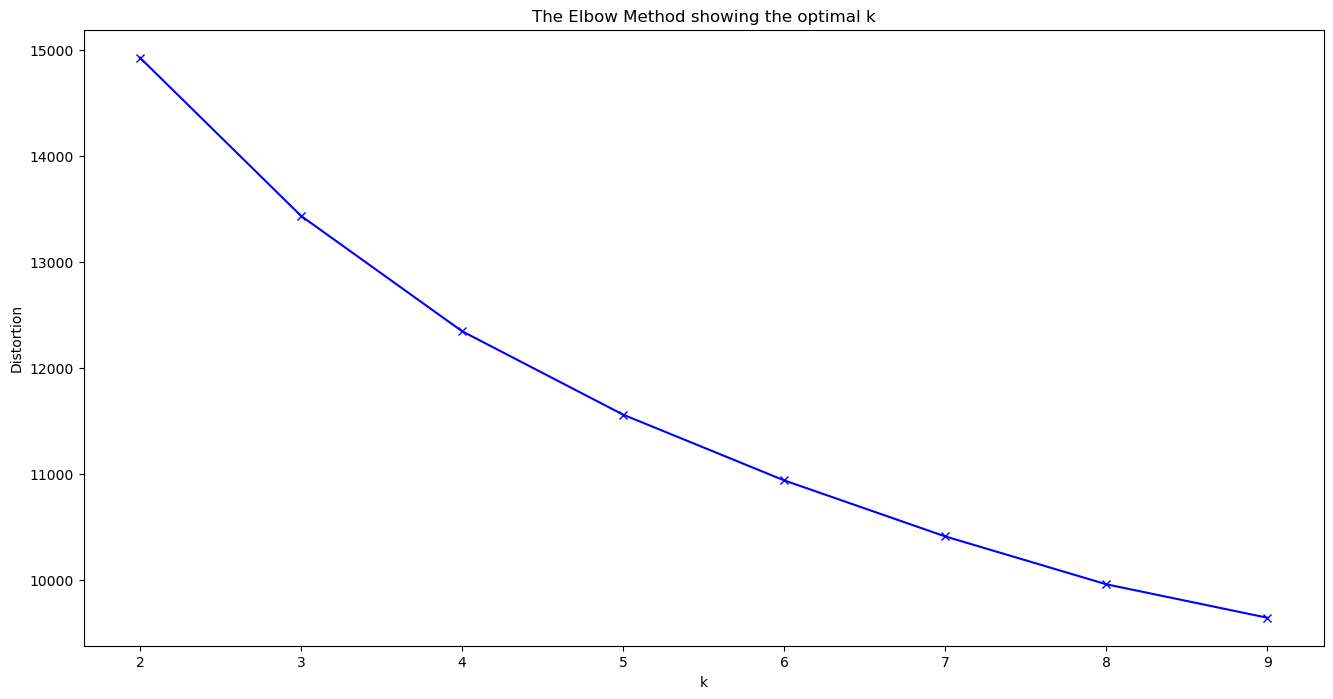

In [21]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

a decrease in the distortion value (Inertia) means that the distance between the data and the centroid is getting closer or more concentrated. We can see from Distortion/Inertia metrics, that the elbow point is around k = 3, because the decrease in distortion value is significant. As we can see, for the next k, the decrease in Distortion metrics is not so significant.  

So, from the elbow point and silhouette score, the optimal number of k is 3, because we don't want too over-simplify the data with 2 cluster and we want capture more variation in the data, with optimal inertia (elbow point).

For n_clusters = 2 The average silhouette_score is : 0.31064031448994894
For n_clusters = 3 The average silhouette_score is : 0.21158305431024427
For n_clusters = 4 The average silhouette_score is : 0.17004438913595066
For n_clusters = 5 The average silhouette_score is : 0.15614644993451884
For n_clusters = 6 The average silhouette_score is : 0.1498411572622178
For n_clusters = 7 The average silhouette_score is : 0.15122283085247423
For n_clusters = 8 The average silhouette_score is : 0.14936243259214507
For n_clusters = 9 The average silhouette_score is : 0.14854128547390794


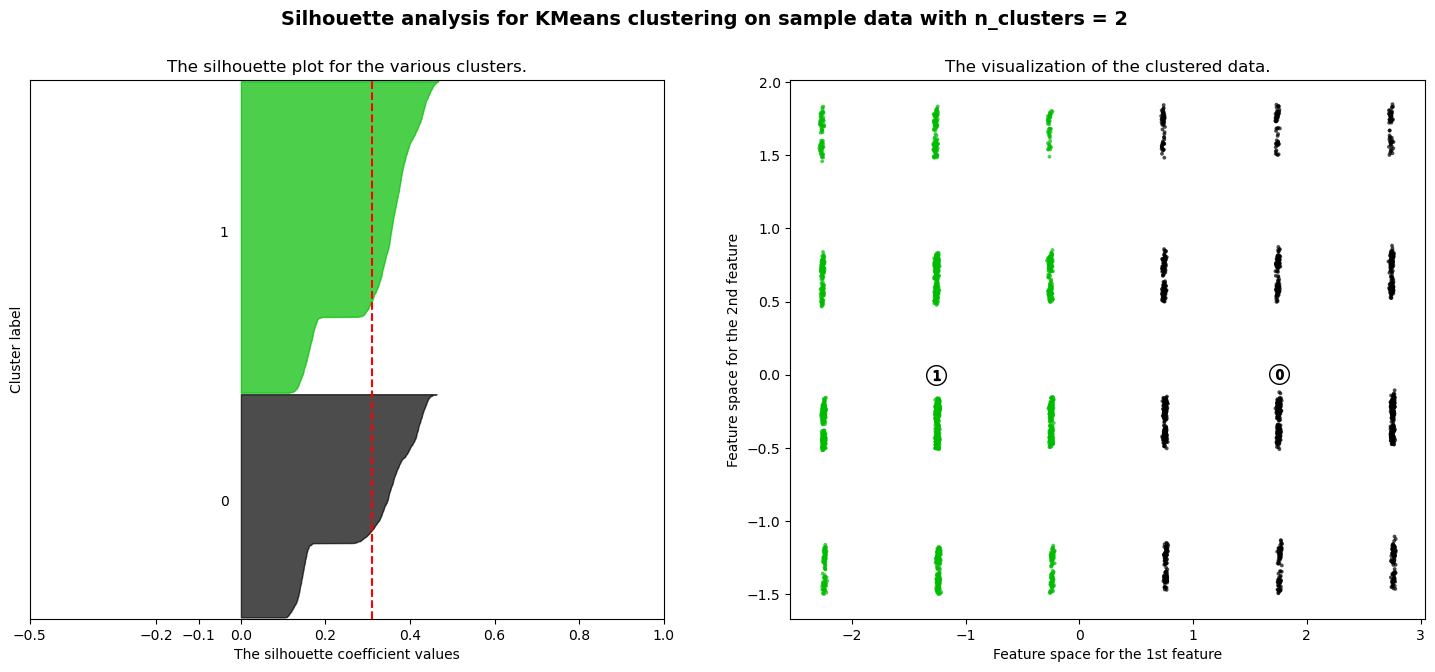

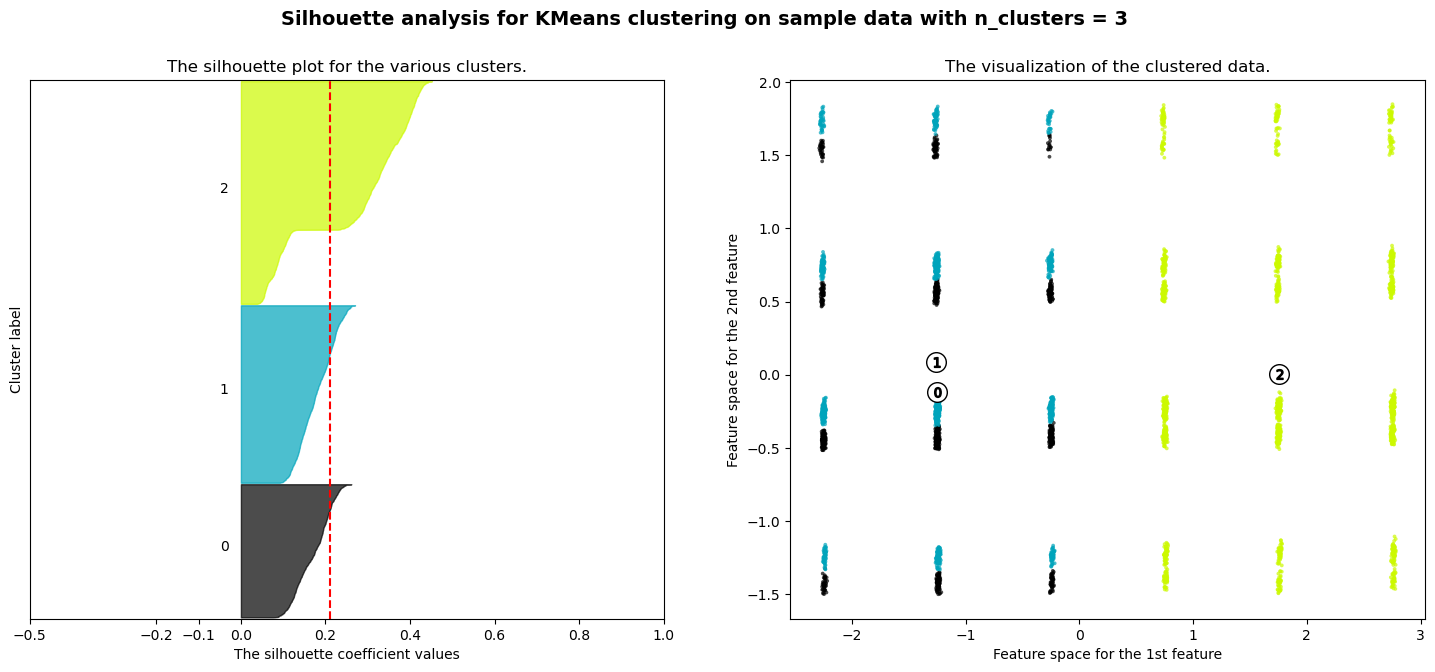

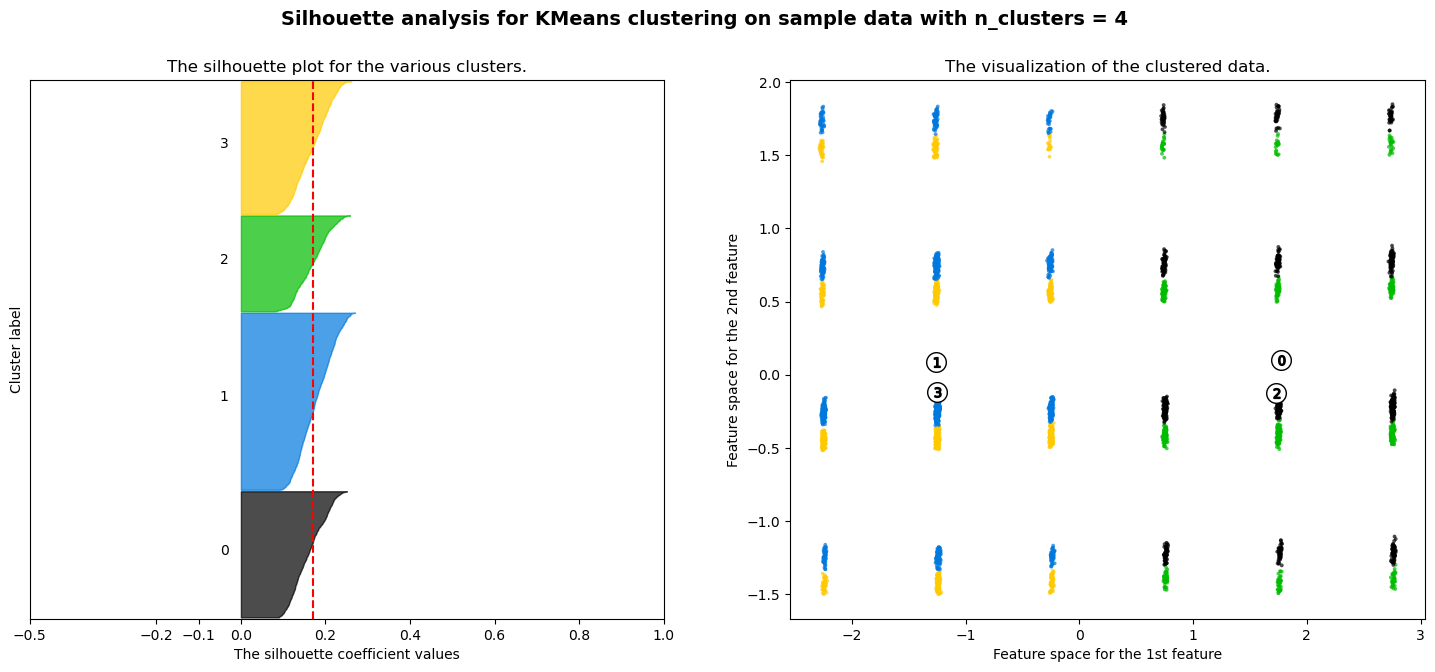

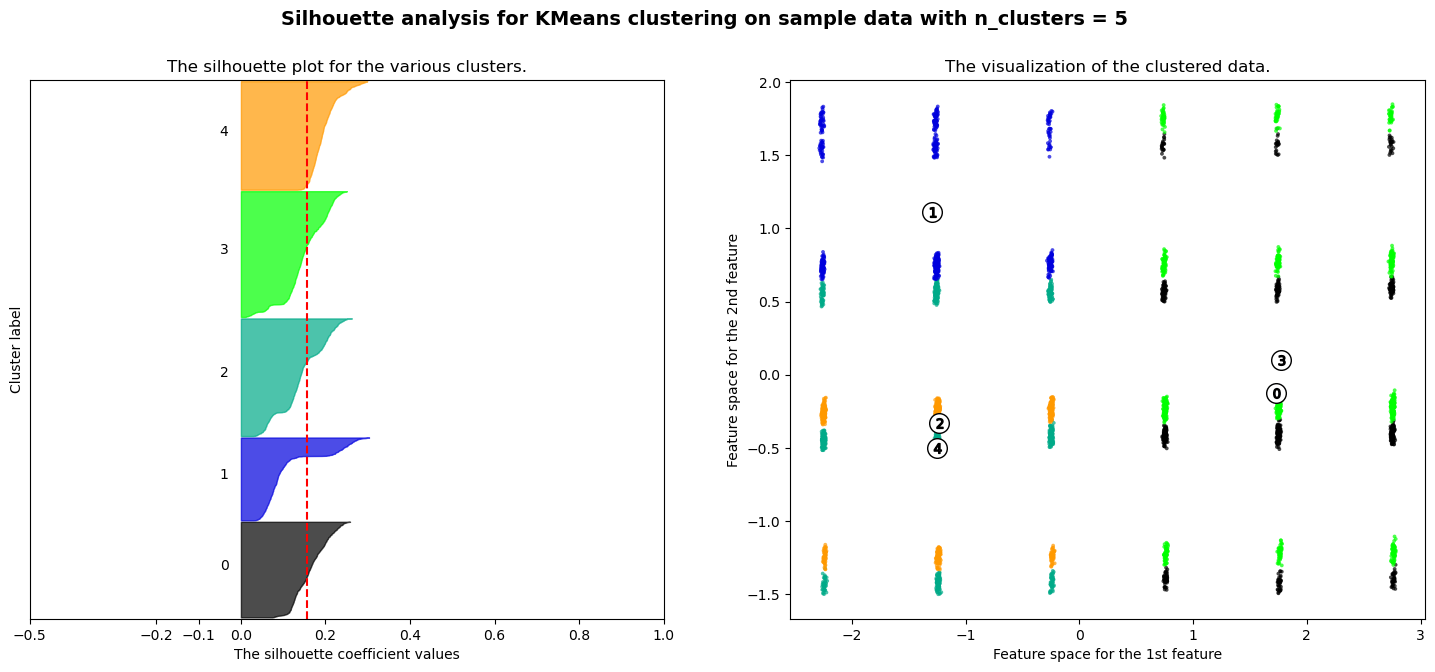

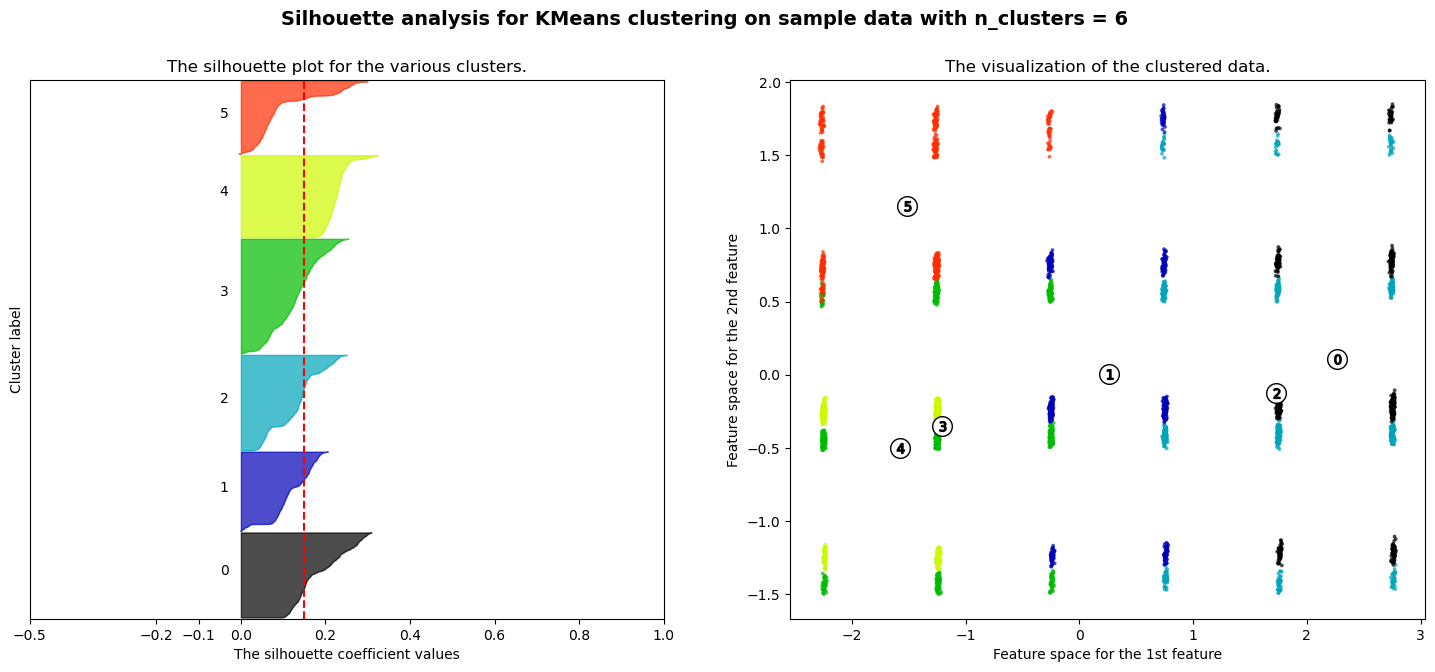

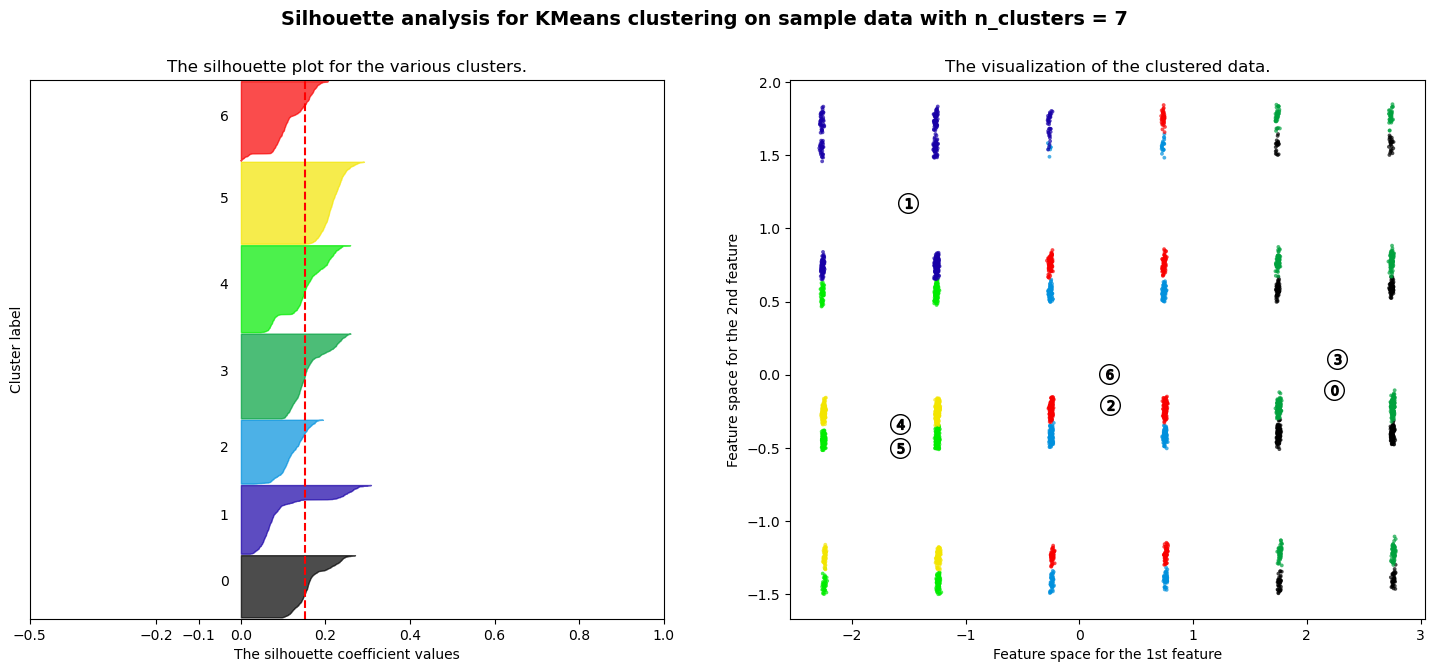

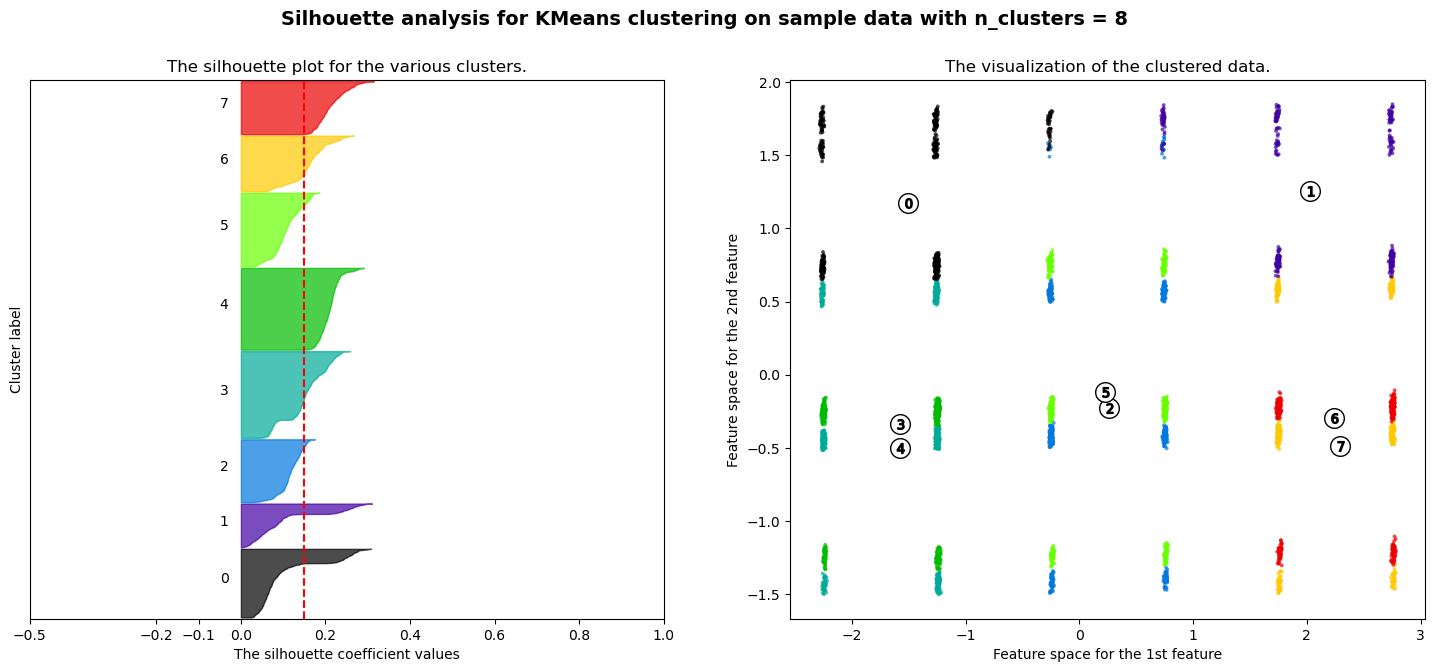

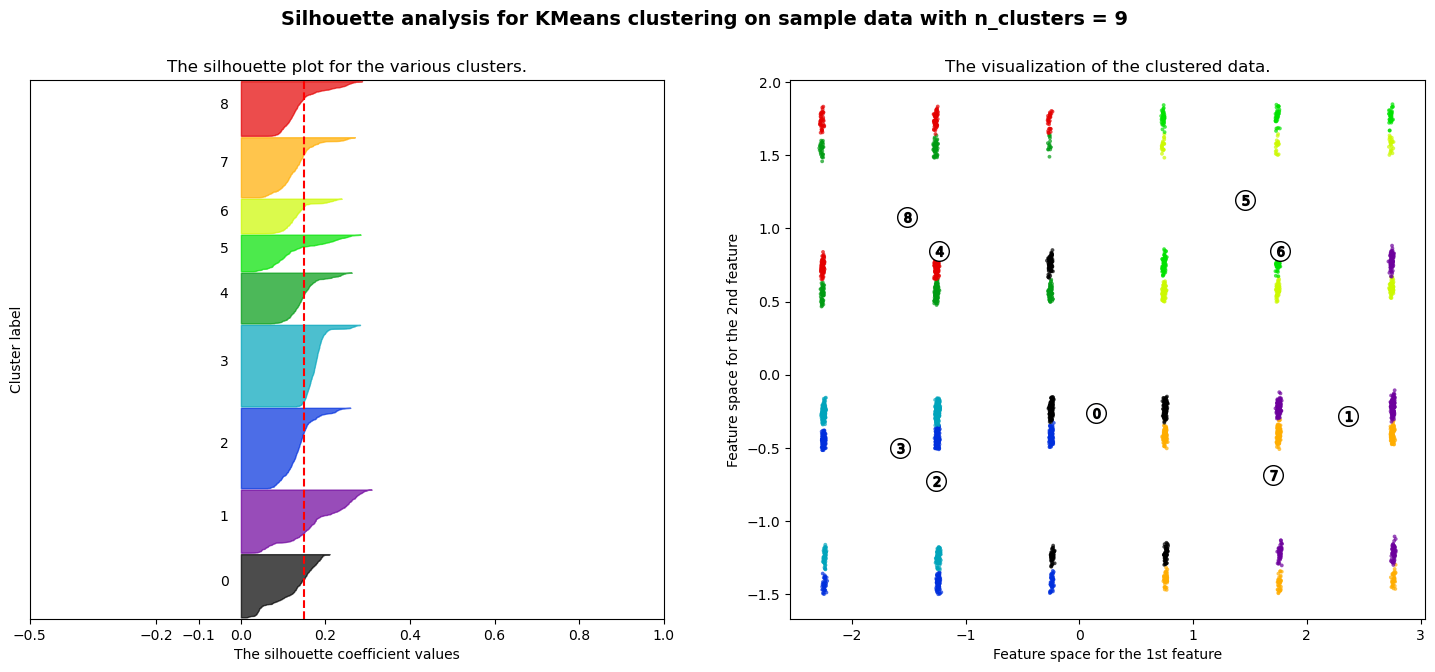

In [22]:
for n_clusters in K:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.5, 1])
    
    # plots of individual clusters
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=123)
    cluster_labels = clusterer.fit_predict(df_pca)

    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.5,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    pca_comp = PCA(n_components=2)
    df_pca_2 = pca_comp.fit_transform(df)

    ax2.scatter(
        df_pca_2[:, 0], df_pca_2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Because the choosen value of k is 3, we can just focus on visualization of n_cluster = 3

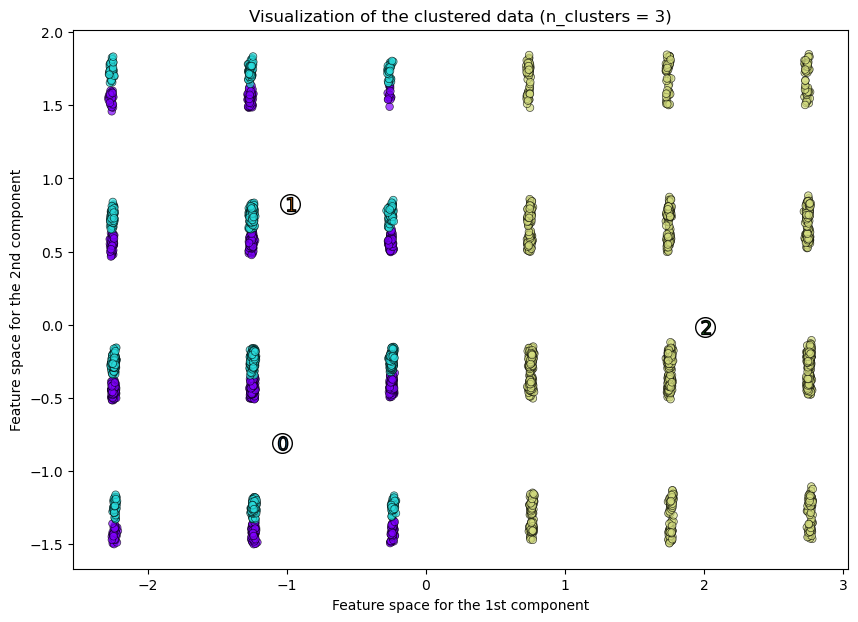

In [23]:
n_clusters = 3

# Perform KMeans clustering for n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=123)
cluster_labels = clusterer.fit_predict(df_pca)

# Apply PCA for dimensionality reduction to 2D
pca_comp = PCA(n_components=2)
df_pca_2 = pca_comp.fit_transform(df)

# Visualize the clustered data
plt.figure(figsize=(10, 7))

# Assign colors to clusters
colormap = plt.cm.rainbow
colors = colormap(cluster_labels.astype(float) / n_clusters)
# colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

# Scatter plot of the data points
plt.scatter(
    df_pca_2[:, 0], 
    df_pca_2[:, 1], 
    c=colors, 
    s=30, 
    marker="o", 
    alpha=0.7, 
    edgecolor= 'black',
    linewidth=0.5
)

# Label the cluster centers
centers = clusterer.cluster_centers_
centers_pca = PCA(n_components=2).fit_transform(centers)  # Transform cluster centers to 2D

plt.scatter(
    centers_pca[:, 0], 
    centers_pca[:, 1], 
    c="white", 
    s=200, 
    marker="o", 
    edgecolor="k", 
    label="Cluster Centers"
)

for i, c in enumerate(centers_pca):
    plt.scatter(c[0], c[1], marker=f"${i}$", s=100, alpha=1, edgecolor="k")

# Add labels and title
plt.title("Visualization of the clustered data (n_clusters = 3)")
plt.xlabel("Feature space for the 1st component")
plt.ylabel("Feature space for the 2nd component")
plt.show()

## C. Analyze Each Customer Cluster

In [24]:
model = KMeans(n_clusters = 3, n_init=10,random_state = 123)
pred = model.fit_predict(df_pca)
df_kmeans = df.copy()
df_kmeans['cluster']=pred
pred

array([2, 2, 2, ..., 1, 2, 1])

In [25]:
# Sort the cluster label, so if i rerun the code, the cluster label doesn't change
cluster_sizes = df_kmeans['cluster'].value_counts().sort_index()

# sort by size
sorted_clusters = cluster_sizes.sort_values().index
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_clusters)}

# mapping
df_kmeans['cluster'] = df_kmeans['cluster'].map(cluster_mapping)

df_kmeans

,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Age,...,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,cluster
0,1,0.4125,2.0,0.24,1,1,1,0.265306,2.0,0.698113,...,0,0,0,0,0,0,0,0,1,2
1,1,0.5500,2.0,0.24,1,1,1,0.020408,2.0,0.018868,...,0,0,0,0,1,0,0,0,0,2
2,1,0.6625,0.0,0.24,1,1,1,0.448980,1.0,0.603774,...,0,0,0,0,0,1,0,0,0,2
3,1,0.8750,1.0,0.40,1,1,1,0.979592,1.0,0.056604,...,1,0,0,0,0,0,0,1,0,2
4,1,0.3625,1.0,0.08,1,1,1,0.612245,5.0,0.509434,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0.1000,2.0,0.68,0,0,0,0.632653,1.0,0.415094,...,0,0,0,0,0,0,0,0,1,2
3896,0,0.3625,2.0,0.80,0,0,0,0.816327,0.0,0.641509,...,0,0,1,1,0,0,0,0,0,2
3897,0,0.1625,2.0,0.16,0,0,0,0.469388,4.0,0.528302,...,0,1,0,0,0,0,0,0,1,1
3898,0,0.7125,0.0,0.52,0,0,0,0.469388,1.0,0.490566,...,0,0,0,0,0,0,0,0,1,2


In [26]:
# Convert Scaled Numerical Column with its original form
df_original_scale = pd.DataFrame(
    mm_scaler.inverse_transform(df_kmeans[num_cols]),
    columns=num_cols
)

# Replace scaled data DataFrame
df_kmeans[num_cols] = df_original_scale

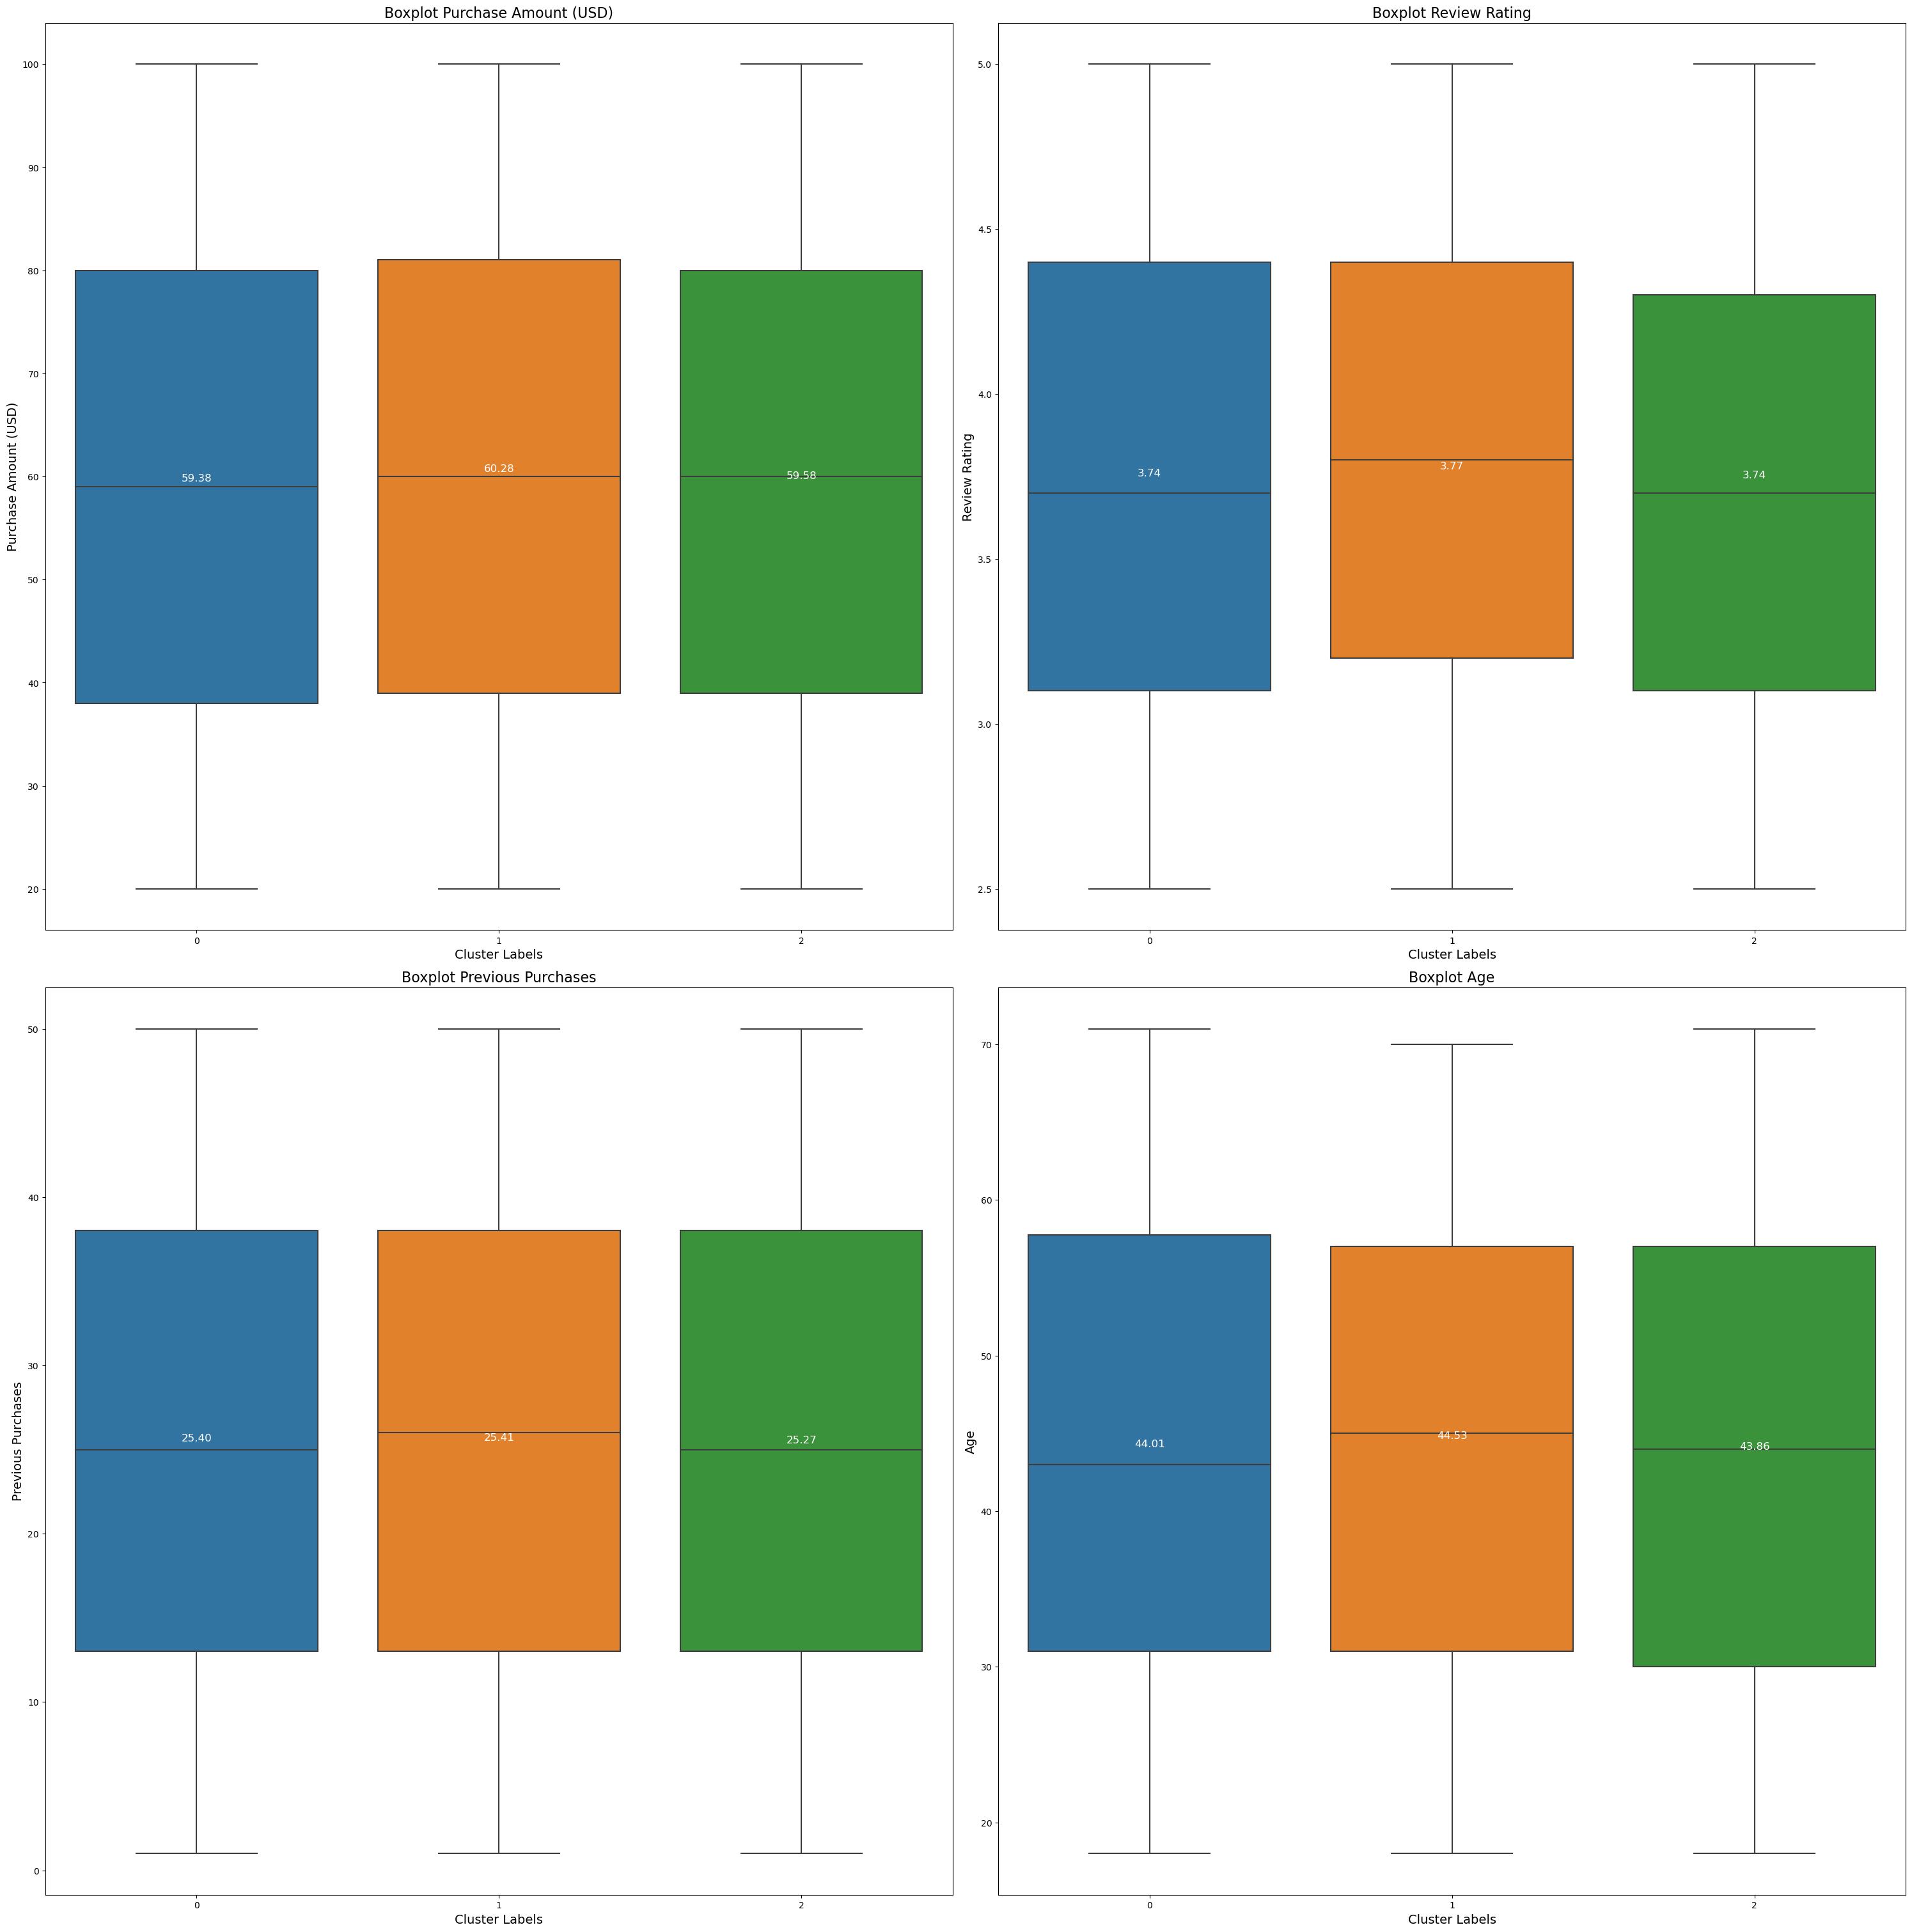

In [27]:
plt.figure(figsize=(30, 60))
for i, fitur in enumerate(num_cols, 1):
    plt.subplot(len(num_cols),2, i)
    sns.boxplot(x='cluster', y=fitur, data=df_kmeans, showfliers=False)  # Menghilangkan outliers dan menggunakan palet warna Set3
    plt.xlabel('Cluster Labels', fontsize=14)
    plt.ylabel(fitur, fontsize=14)
    plt.title(f'Boxplot {fitur}', fontsize=16)
    
    # Menambahkan garis rata-rata ke dalam boxplot
    means = df_kmeans.groupby('cluster')[fitur].mean().values
    for j, mean in enumerate(means):
        plt.text(j, mean, f'{mean:.2f}', ha='center', va='bottom', color='white', fontsize=12)

plt.tight_layout()
plt.show()

In [28]:
# choose only num_cols
selected_columns = df_kmeans[num_cols + ['cluster']]

# Group by 'cluster' dan hitung statistik deskriptif
selected_statistics_by_cluster = selected_columns.groupby('cluster').describe()

selected_statistics_by_cluster.T

cluster                               0            1            2
Purchase Amount (USD) count  974.000000  1298.000000  1628.000000
                      mean    59.382957    60.284284    59.578010
                      std     23.612758    23.782004    23.659008
                      min     20.000000    20.000000    20.000000
                      25%     38.000000    39.000000    39.000000
                      50%     59.000000    60.000000    60.000000
                      75%     80.000000    81.000000    80.000000
                      max    100.000000   100.000000   100.000000
Review Rating         count  974.000000  1298.000000  1628.000000
                      mean     3.744661     3.765871     3.740418
                      std      0.726554     0.713067     0.712726
                      min      2.500000     2.500000     2.500000
                      25%      3.100000     3.200000     3.100000
                      50%      3.700000     3.800000     3.700000
                      75%      4.400000     4.400000     4.300000
                      max      5.000000     5.000000     5.000000
Previous Purchases    count  974.000000  1298.000000  1628.000000
                      mean    25.400411    25.411402    25.274570
                      std     14.464751    14.436587    14.453500
                      min      1.000000     1.000000     1.000000
                      25%     13.000000    13.000000    13.000000
                      50%     25.000000    26.000000    25.000000
                      75%     38.000000    38.000000    38.000000
                      max     50.000000    50.000000    50.000000
Age                   count  974.000000  1298.000000  1628.000000
                      mean    44.006160    44.528505    43.856880
                      std     15.455535    15.157651    15.104912
                      min     18.000000    18.000000    18.000000
                      25%     31.000000    31.000000    30.000000
                      50%     43.000000    45.000000    44.000000
                      75%     57.750000    57.000000    57.000000
                      max     71.000000    70.000000    71.000000

In the Purchase Amount column, cluster 0 and cluster 2 have quite similar characteristics, the IQR ranges are very similar, with slightly different mean values of 59.38 and 59.58. Likewise with cluster 1, the difference is that cluster 1 has a higher mean, which is 60.28. From the median, cluster 1 has the same median value as the cluster 2 (60). We can see that the customer in cluster 1 have a higher average Purchase Amount.

In the Review Rating column, cluster 1 has a higher mean and median value, with a mean = 3.77 and median 3.8. While clusters 0 and 2 have a lower mean and median, namely mean of cluster 0 = 3.74, mean of cluster 2 = 3.74 and median cluster 0 = median cluster 2 = 3.7. So it can be said that cluster 1 has an average Review Rating that is slightly higher than other clusters.

In the Previous Purchase column, the mean values in cluster 0 and cluster 1 are quite high than cluster 2, with mean = 25.4 month. This means that the distance in time from previous purchases by customers in cluster 0 and 1 is longer than cluster 2 (25.27 month). It can also be seen that in cluster 1, the median (26) value is the highest among the other cluster. So, based on the average month on Previous Purchase, customer in cluster 2 slightly quicker return to shopping.

In the Age column, in average age, the cluster with the youngest average age is cluster 2 with an age of 43.86, followed by cluster 0 with an average age of 44.01, and the oldest is cluster 1 with an average age of 44.53.

In [29]:
# Frequency of Purchases
frequency_purchases_distribution = df_kmeans.groupby('cluster')['Frequency of Purchases'].value_counts()
frequency_purchases_distribution

cluster  Frequency of Purchases
0        4.0                       499
         5.0                       238
         3.0                       237
1        4.0                       648
         5.0                       334
         3.0                       316
2        0.0                       547
         2.0                       542
         1.0                       539
Name: count, dtype: int64

This is an interesting key value, the customer in cluster 2 have DIFFERENT FREQUENCY of purchases, Customer in cluster 2 is the most frequently make a purchases ('Bi-Weekly', 'Weekly','Fortnightly'). The customer in cluster 0 and cluster 1 is doing purchase 'Monthly', 'Quarterly' and 'Annually'. However, there are more customers in cluster 1 for each value than cluster 0.

In [30]:
# Analyze Preferred Payment Method distribution
payment_method = [
    'Preferred Payment Method_Bank Transfer',
    'Preferred Payment Method_Cash',
    'Preferred Payment Method_Credit Card',
    'Preferred Payment Method_Debit Card',
    'Preferred Payment Method_PayPal',
    'Preferred Payment Method_Venmo',
]

payment_method_proportion = df_kmeans.groupby('cluster')[payment_method].mean()

payment_method_proportion.T


cluster,0,1,2
Preferred Payment Method_Bank Transfer,0.162218,0.153313,0.156634
Preferred Payment Method_Cash,0.163244,0.168721,0.179361
Preferred Payment Method_Credit Card,0.165298,0.179507,0.170147
Preferred Payment Method_Debit Card,0.172485,0.153313,0.165233
Preferred Payment Method_PayPal,0.169405,0.183359,0.168305
Preferred Payment Method_Venmo,0.167351,0.161787,0.160319


Based on the Preferred Payment Method, most customers in cluster 0 prefer to pay using Debit Card and Paypal, in cluster 1 most of them choose Paypal and credit cards, and in cluster 2 most customers choose cash.

In [31]:
# Subscription Status
subscription_proportion = df_kmeans.groupby('cluster')['Subscription Status'].mean()
subscription_proportion

cluster
0    0.619097
1    0.000000
2    0.276413
Name: Subscription Status, dtype: float64

The most customers with subscriptions are in cluster 0 and the most customers without subscriptions are in cluster 1. In fact, all of the customer in cluster 1 are not having Subscription Status.

In [32]:
# Shipping Type
shipping_columns = [col for col in df_kmeans.columns if 'Shipping' in col]

shipping_proportion = df_kmeans.groupby('cluster')[shipping_columns].mean()

shipping_proportion.T

cluster,0,1,2
Shipping Type_2-Day Shipping,0.155031,0.167951,0.158477
Shipping Type_Express,0.165298,0.156394,0.173219
Shipping Type_Free Shipping,0.173511,0.181048,0.166462
Shipping Type_Next Day Air,0.173511,0.161787,0.165233
Shipping Type_Standard,0.157084,0.167951,0.173833
Shipping Type_Store Pickup,0.175565,0.164869,0.162776


Most of the customer in cluster 0 prefer store pickup, free shipping, and next day air  
most of the customer in cluster 1 prefer free shipping  
and most of the customer in cluster 2 prefer standard and express.

#### Summary
Customer Cluster 0:
1. The average time from Previous Purchase of customers in cluster 0 is high, like cluster 1 (25.4 month), means the average previous purchase made by cluster 0 is the older than cluster 2.
2. The average Purchase Amount of cluster 0 is the lowest among the other clusters.
3. The average Age of customers in cluster 0 is in the middle of other cluster, which is 44.01 years.
4. Customers in cluster 0 make purchases on a 'Monthly', 'Quarterly' and 'Annually' basis.
5. Many of them prefer to make payments with debit card and paypal.
6. Among the three clusters, the most customers with subscription are in cluster 0.
7. Many of the customers in cluster 0 choose store pickup, free shipping, and next day air.

It is suitable to recommend affordable products, for example by utilizing special promos for customers with subscriptions. Also take advantage of the monthly season, which is their shopping time  

Customer Cluster 1:
1. The average Purchase Amount in cluster 1 is the highest among other clusters, which is 60.28 USD.
2. The average of time gap from Previous Purchase in cluster 1 is high like cluster 0, with an average of 25.4 months.
3. The average Review Rating in cluster 1 is the highest compared to other clusters, which is 3.77, as well as the median value of the Review Rating in cluster 1 of 3.8, we can say that cluster 1 gives a higher Review Rating.
4. The average age of customers in cluster 1 is the oldest among other clusters, which is 44.53 years.
5. Customers in cluster 1 make clothing purchases on a 'Monthly', 'Quarterly' and 'Annually' basis.
6. Many of the customers in cluster 1 prefer payment using paypal and credit card.
7. All customers in cluster 1 do not have a subscription.
8. Free shipping is preferred by many customers in cluster 1.  

It is recommended to recommend higher-priced products in line with seasonal trends, coupled with free shipping promos, and also good service even if the customer is without subscription.  

Customer Cluster 2:
1. The average Purchase Amount of cluster 2 is in the middle of the other clusters (59.58 USD).
2. The average Review Rating given by customers in cluster 2 is lower than other clusters, with an average of 3.7404.
3. Customers in cluster 2 have the lowest average Age of 43.86 years.
4. All customers who make purchases on a 'Bi-Weekly', 'Weekly', and 'Fortnightly' basis are located in cluster 2.
5. Many of the customers in cluster 2 choose the cash payment method.
6. In proportion, most of the customers in cluster 2 do not have a subscription.
7. Many of the customers in cluster 2 prefer Standard and Express shipping.

Ideal for recommending trending products that include fast fashion to utilize cluster 2 shopping routines.  